In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import default_rng , MT19937
import matplotlib.colors as mcolors
from tqdm import tqdm
from matplotlib.animation import FuncAnimation, PillowWriter


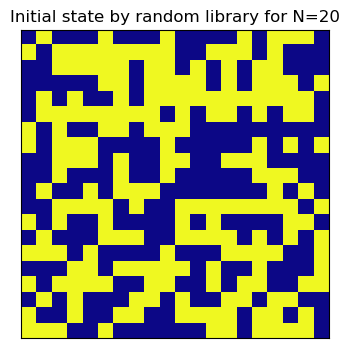

In [2]:
def Initialize(N):
    np.random.seed(42)
    state=np.random.choice(np.array([-1,1]),size=(N,N))
    return  state
N_test=20
init_state=Initialize(N_test)
fig,ax=plt.subplots(figsize=(6,4))

ax.matshow(init_state,cmap=plt.cm.plasma)
ax.set_xticks([])
ax.set_yticks([])
plt.title('Initial state by random library for N='+str(N_test))
plt.show()

# Here, I try to flip only one rundom single spin, without if conditions

Example of single spin flip:


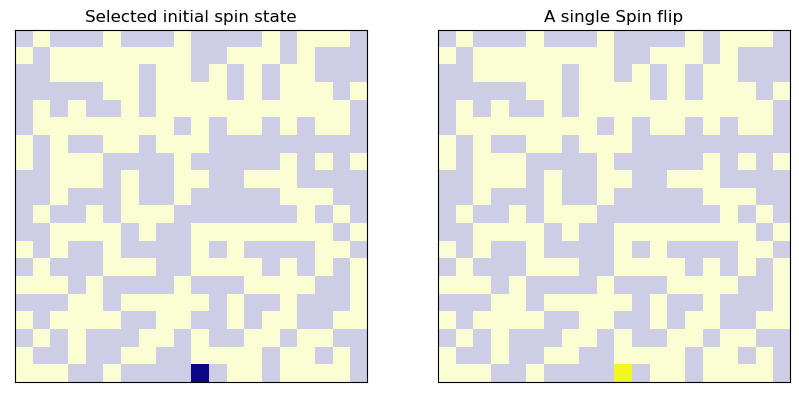

In [3]:
new_state = init_state.copy()

alpha = np.full((N_test,N_test), 0.2)
i, j = np.random.randint(N_test), np.random.randint(N_test)
new_state[i,j] = -1. * new_state[i,j]
selected_spin = np.where(init_state != new_state)
alpha[selected_spin[0], selected_spin[1]] = 1

print("Example of single spin flip:")

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,8))
ax1.matshow(init_state, cmap = plt.cm.plasma, alpha = alpha)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Selected initial spin state")
ax2.matshow(new_state, cmap = plt.cm.plasma, alpha = alpha)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("A single Spin flip")
plt.show()


# Spin Flip by Metropolis Algorithm and Spins Sweeps

In [4]:
def Spin_Flip_Met_Alg(N,state, Temper):
  i, j = np.random.randint(N), np.random.randint(N)  #random spin sellection
  # get sum of nearest neighbour values in the lattice
  nn = state[(i-1)%N, j] + state[(i+1)%N, j] + state[i, (j-1)%N] + state[i, (j+1)%N] 
  
  # get delta energy
  deltaE = 2 * state[i,j] * nn

  # Metropolis
  if deltaE < 0:
    state[i,j] = -1. * state[i,j]
  elif np.random.random() < np.exp(- deltaE/Temper):
    state[i,j] = -1. * state[i,j]
  return state

def Spins_Sweeps(N,state,Temper):
  for i in range(N**2):
      state=Spin_Flip_Met_Alg(N,state,Temper)
  return state

In [5]:
N=100  # number of sites in one direction and in total I have 100x100 site
T0=0.0001
T1=1   #k_B=1
T2=3
init_state=Initialize(N)

N_sweeps=10**3  # Number of Sweeps. It needs to be 10**4 or 10**5 at the end



100%|██████████| 1000/1000 [03:47<00:00,  4.40it/s]


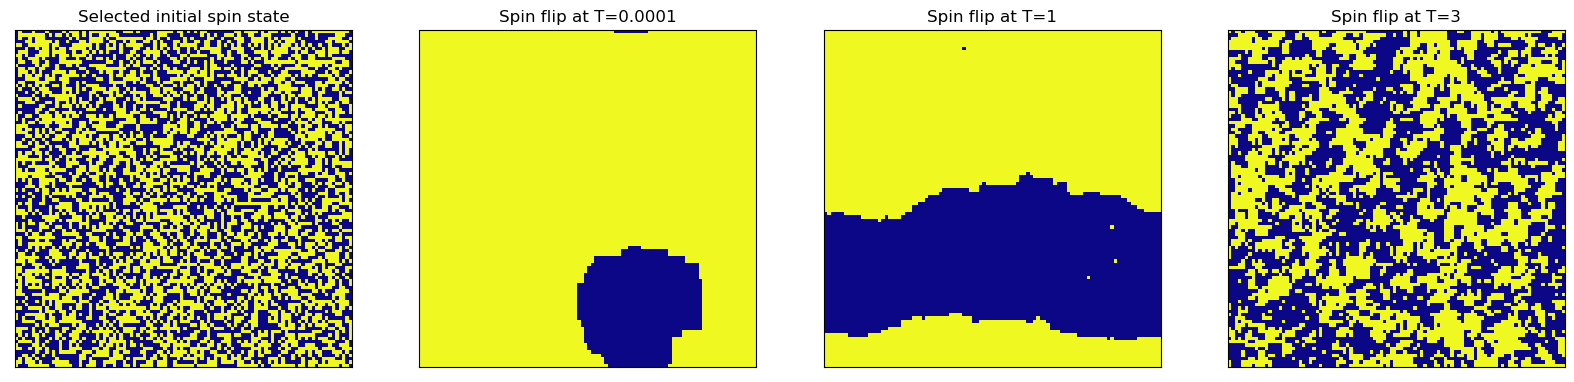

In [6]:

fig, (ax0,ax1, ax2,ax3) = plt.subplots(nrows = 1, ncols = 4, figsize=(20,6))
ax0.matshow(init_state, cmap = plt.cm.plasma)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title("Selected initial spin state")
In_St0=np.copy(init_state)
In_St1=np.copy(init_state)
In_St2=np.copy(init_state)


for j in tqdm(range(N_sweeps)):
    state_at_T0=Spins_Sweeps(N,In_St0,T0)
    state_at_T1=Spins_Sweeps(N,In_St1,T1)
    state_at_T2=Spins_Sweeps(N,In_St2,T2)
ax1.matshow(state_at_T0, cmap = plt.cm.plasma)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Spin flip at T="+str(T0))

ax2.matshow(state_at_T1, cmap = plt.cm.plasma)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Spin flip at T="+str(T1))

ax3.matshow(state_at_T2, cmap = plt.cm.plasma)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title("Spin flip at T="+str(T2))

plt.show()

In [7]:
def Energy(N,state):
    E=0
    for i in range(N):
        for j in range(N):
            near_neighb=state[(i-1)%N,j]+state[(i+1)%N,j]+state[i,(j-1)%N]+state[i,(j+1)%N]
            E-=state[i,j]*near_neighb
    return E/2.0

def Magnetization(state):
    '''Magnetization of a given configuration'''
    mag = np.sum(state)
    return mag

100%|██████████| 1000/1000 [03:05<00:00,  5.40it/s]


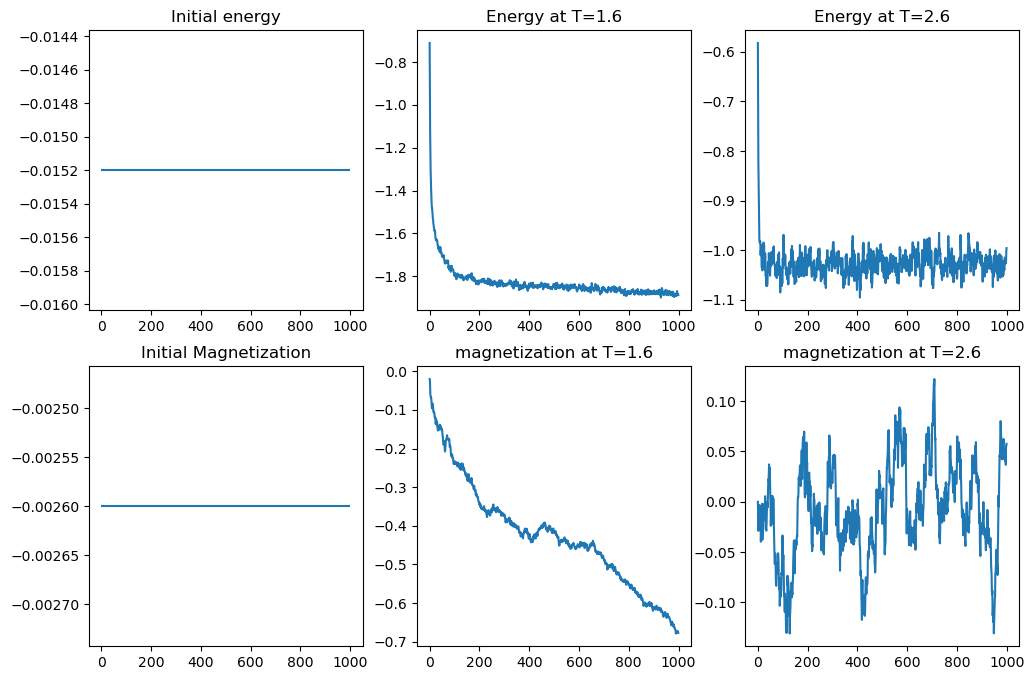

In [8]:

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(12,8))
E_initial=Energy(N,init_state)
ax[0][0].set_title("Initial energy")
ax[0][0].hlines(E_initial/N**2,0,N_sweeps)
Mag0=Magnetization(init_state)
ax[1][0].set_title("Initial Magnetization")
ax[1][0].hlines(Mag0/N**2,0,N_sweeps)
T1=1.6
T2=2.6
Mag1=[]
Mag2=[]
Energy_at_T1=[]
Energy_at_T2=[]
In_St1=np.copy(init_state)
In_St2=np.copy(init_state)
for j in tqdm(range(N_sweeps)):
    state_at_T1=Spins_Sweeps(N,In_St1,T1)
    state_at_T2=Spins_Sweeps(N,In_St2,T2)
    Energy_at_T1.append(Energy(N,state_at_T1)/N**2)
    Energy_at_T2.append(Energy(N,state_at_T2)/N**2)
    mag_at_T1 = Magnetization(state_at_T1)/N**2
    mag_at_T2 = Magnetization(state_at_T2)/N**2
    Mag1.append(mag_at_T1)
    Mag2.append(mag_at_T2)
ax[0][1].plot(range(N_sweeps),Energy_at_T1)
ax[0][1].set_title("Energy at T="+str(T1))
ax[1][1].plot(range(N_sweeps),Mag1)
ax[1][1].set_title("magnetization at T="+str(T1))

ax[0][2].plot(range(N_sweeps),Energy_at_T2)
ax[0][2].set_title("Energy at T="+str(T2))
ax[1][2].plot(range(N_sweeps),Mag2)
ax[1][2].set_title("magnetization at T="+str(T2))

plt.show()

# Abs value of the magnetization

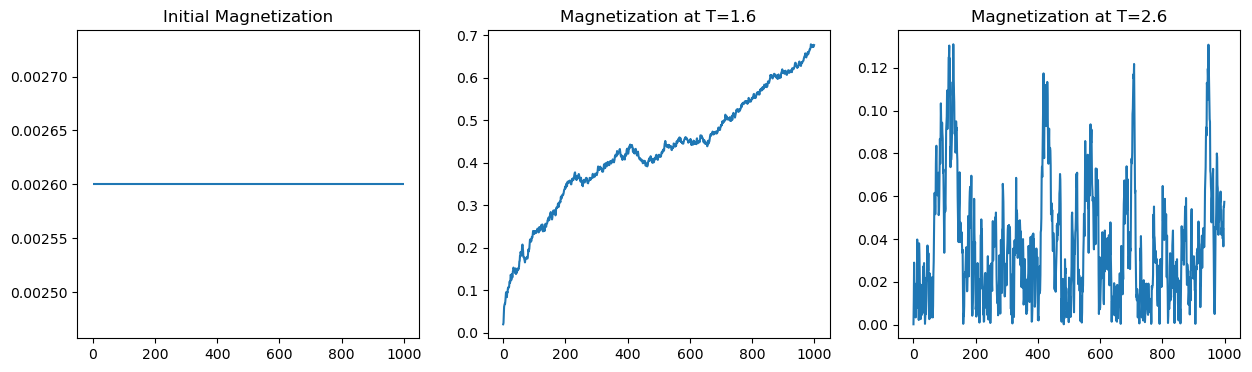

In [9]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(15,4))
ax1.set_title("Initial Magnetization")
ax1.hlines(np.abs(Mag0)/N**2,0,N_sweeps)
ax2.set_title("Magnetization at T="+str(T1))
ax2.plot(range(N_sweeps),np.abs(Mag1))
ax3.set_title("Magnetization at T="+str(T2))
ax3.plot(range(N_sweeps),np.abs(Mag2))

plt.show()
